[[4.43184841e-03 5.14264092e-03 5.95253242e-03 ... 2.58118214e-11
  1.83033222e-11 1.29465919e-11]
 [2.38408820e-03 2.79425841e-03 3.26681906e-03 ... 9.95671791e-11
  7.13132812e-11 5.09493796e-11]
 [1.23221917e-03 1.45873080e-03 1.72256894e-03 ... 3.69013262e-10
  2.66955661e-10 1.92641815e-10]
 ...
 [5.08814028e-10 6.99826595e-10 9.60143337e-10 ... 1.03828130e-03
  8.72682695e-04 7.31664463e-04]
 [1.38667999e-10 1.92641815e-10 2.66955661e-10 ... 2.02904806e-03
  1.72256894e-03 1.45873080e-03]
 [3.63096150e-11 5.09493796e-11 7.13132812e-11 ... 3.80976210e-03
  3.26681906e-03 2.79425841e-03]]


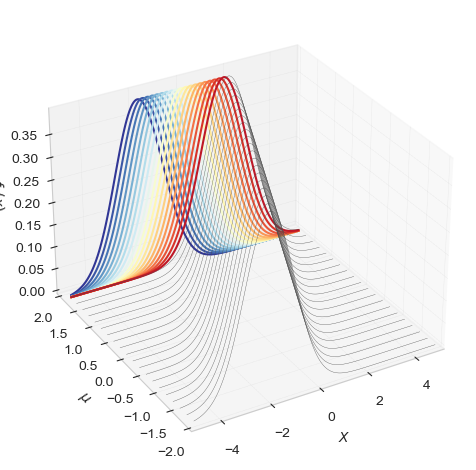

(0.0, 0.3989422804014327)

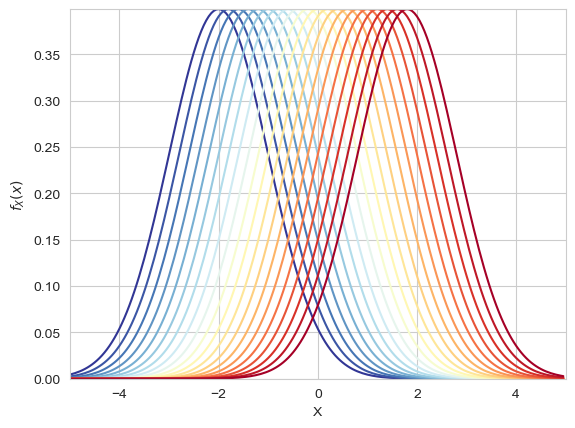

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm  # Colormaps


def uni_normal_pdf(x, mu, sigma):
    '''归一化'''

    coeff = 1 / np.sqrt(2 * np.pi) / sigma
    z = (x - mu) / sigma
    f_x = coeff * np.exp(-1 / 2 * z ** 2)

    return f_x


# X 取值
X = np.arange(-5, 5, 0.05)
# 均值
mu = np.arange(-2, 2, 0.2)

XX, MM = np.meshgrid(X, mu)

sigma = 1

f_x_varying_mu = uni_normal_pdf(XX, MM, sigma)
print(f_x_varying_mu)
# surface projected along Y to X-Z plane

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(XX, MM, f_x_varying_mu, rstride=1, cstride=0,
                  color=[0.3, 0.3, 0.3],
                  linewidth=0.25)

ax.contour(XX, MM, f_x_varying_mu,
           levels=20, zdir='y', \
           offset=mu.max(), cmap=cm.RdYlBu_r)

ax.set_xlabel('$X$')
ax.set_ylabel('$\mu$')
ax.set_zlabel('$f_{X}(x)$')

ax.xaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})
ax.yaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})
ax.zaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})

ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)

ax.view_init(azim=-120, elev=30)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(mu)))

for i in np.linspace(1, len(mu), len(mu)):
    plt.plot(X, f_x_varying_mu[int(i) - 1, :],
             color=colors[int(i) - 1])

plt.xlabel('X')
plt.ylabel('$f_{X}(x)$')
ax.set_xlim(-5, 5)
ax.set_ylim(0, f_x_varying_mu.max())

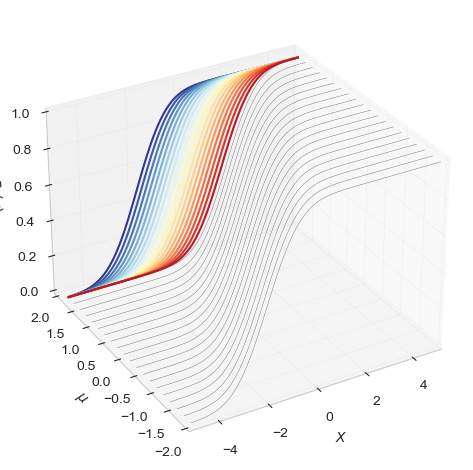

(0.0, 0.9999999999981736)

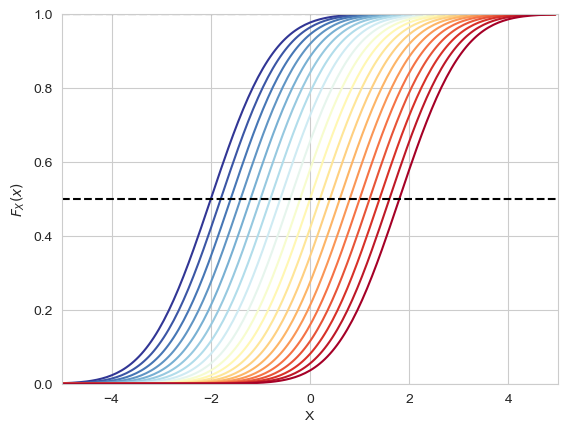

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm  # Colormaps
from scipy.stats import norm

# varying mu

X = np.arange(-5, 5, 0.05)
mu = np.arange(-2, 2, 0.2)

XX, MM = np.meshgrid(X, mu)

sigma = 1

F_x_varying_mu = norm.cdf(XX, loc=MM, scale=sigma)

# surface projected along Y to X-Z plane

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(XX, MM, F_x_varying_mu, rstride=1, cstride=0,
                  color=[0.3, 0.3, 0.3],
                  linewidth=0.25)

ax.contour(XX, MM, F_x_varying_mu,
           levels=20, zdir='y', \
           offset=mu.max(), cmap=cm.RdYlBu_r)

ax.set_xlabel('$X$')
ax.set_ylabel('$\mu$')
ax.set_zlabel('$F_{X}(x)$')

ax.xaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})
ax.yaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})
ax.zaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})

ax.set_xlim(-5, 5)
ax.set_ylim(-2, 2)

ax.view_init(azim=-120, elev=30)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(mu)))

for i in np.linspace(1, len(mu), len(mu)):
    plt.plot(X, F_x_varying_mu[int(i) - 1, :],
             color=colors[int(i) - 1])

plt.axhline(y=0.5, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

plt.xlabel('X')
plt.ylabel('$F_{X}(x)$')
ax.set_xlim(-5, 5)
ax.set_ylim(0, F_x_varying_mu.max())

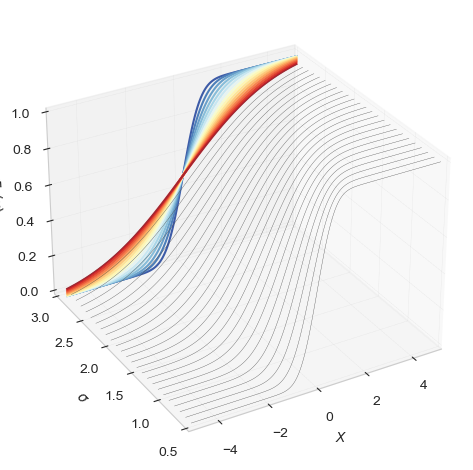

(0.0, 0.9999999999981736)

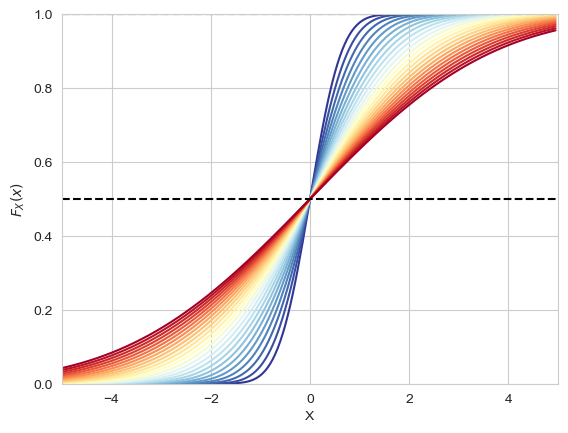

In [3]:
X = np.arange(-5, 5, 0.05)
sigma = np.arange(0.5, 3, 0.1)

XX, SS = np.meshgrid(X, sigma)

mu = 0

F_x_varying_sig = norm.cdf(XX, loc=mu, scale=SS)

# F_x_varying_sig = np.cumsum(f_x_varying_sig,axis = 1)*0.05

# surface projected along Y to X-Z plane

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(XX, SS, F_x_varying_sig, rstride=1, cstride=0,
                  color=[0.3, 0.3, 0.3],
                  linewidth=0.25)

ax.contour(XX, SS, F_x_varying_sig,
           levels=20, zdir='y', \
           offset=sigma.max(), cmap=cm.RdYlBu_r)

ax.set_xlabel('$X$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('$F_{X}(x)$')

ax.xaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})
ax.yaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})
ax.zaxis._axinfo["grid"].update({"linewidth": 0.25, "linestyle": ":"})

ax.set_xlim(-5, 5)
ax.set_ylim(0.5, 3)

ax.view_init(azim=-120, elev=30)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots()

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(sigma)))

for i in np.linspace(1, len(sigma), len(sigma)):
    plt.plot(X, F_x_varying_sig[int(i) - 1, :],
             color=colors[int(i) - 1])

plt.axhline(y=0.5, color='k', linestyle='--')
plt.axhline(y=1, color='k', linestyle='--')

plt.xlabel('X')
plt.ylabel('$F_{X}(x)$')
ax.set_xlim(-5, 5)
ax.set_ylim(0, F_x_varying_mu.max())

Text(0, 0.5, 'PDF, $f_{Z}(z)$')

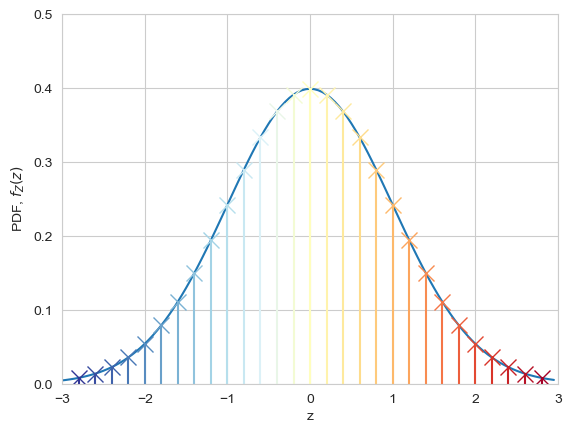

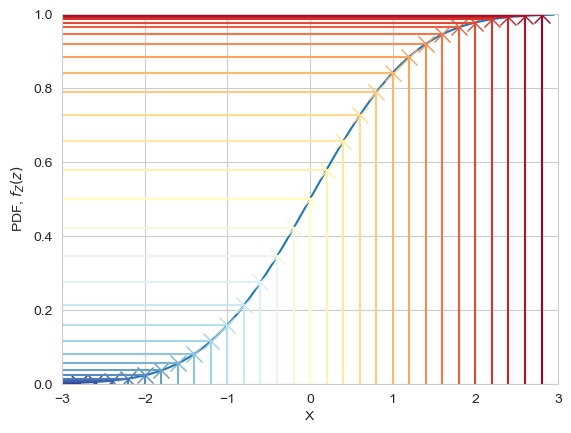

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm  # Colormaps
from scipy.stats import norm

X = np.arange(-3, 3, 0.05)
mu = 0
sigma = 1

x_selected = np.linspace(-2.8, 2.8, num=29)

# PDF
f_x = norm.pdf(X, loc=mu, scale=sigma)

fig, ax = plt.subplots()

# 绘制 PDF
plt.plot(X, f_x)

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(x_selected)))

for i in np.linspace(0, len(x_selected) - 1, len(x_selected)):
    x_selected_i = x_selected[int(i)]

    x_PDF = norm.pdf(x_selected_i)

    plt.vlines(x=x_selected_i,
               ymin=0, ymax=x_PDF,
               color=colors[int(i)])

    plt.plot(x_selected_i, x_PDF, marker='x', color=colors[int(i)],
             markersize=12)

ax.set_xlim(-3, 3)
ax.set_ylim(0, 0.5)
ax.set_xlabel('z')
ax.set_ylabel('PDF, $f_{Z}(z)$')

F_x = norm.cdf(X, loc=mu, scale=sigma)

fig, ax = plt.subplots()

# 绘制 CDF 
plt.plot(X, F_x)

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(x_selected)))

for i in np.linspace(0, len(x_selected) - 1, len(x_selected)):
    x_selected_i = x_selected[int(i)]

    x_CDF = norm.cdf(x_selected_i)

    plt.vlines(x=x_selected_i,
               ymin=0, ymax=x_CDF,
               color=colors[int(i)])

    plt.hlines(y=x_CDF,
               xmin=-3, xmax=x_selected_i,
               color=colors[int(i)])

    plt.plot(x_selected_i, x_CDF, marker='x', color=colors[int(i)],
             markersize=12)

ax.set_xlim(-3, 3)
ax.set_ylim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('PDF, $f_{Z}(z)$')

Text(0, 0.5, 'CDF, $F_{Z}(z)$')

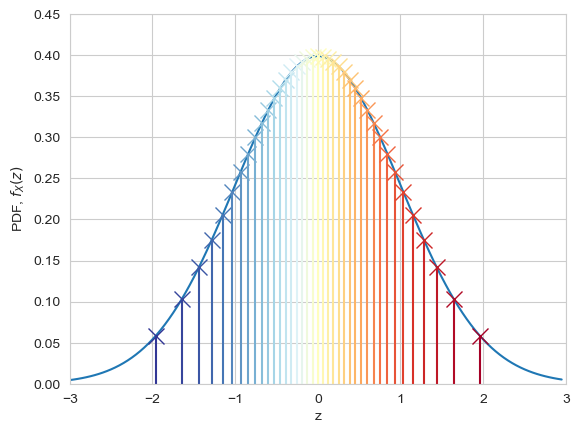

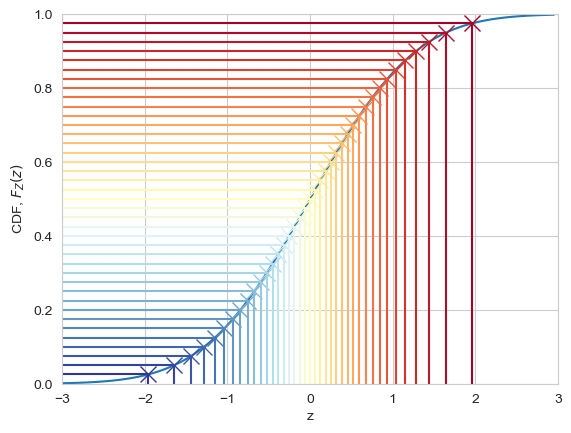

In [5]:
percentiles = np.linspace(0.025, 0.975, num=39)
# 计算 PDF
f_x = norm.pdf(X, loc=mu, scale=sigma)

fig, ax = plt.subplots()

# 绘制 PDF
plt.plot(X, f_x)
# 创建颜色映射
colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(percentiles)))

for i in np.linspace(0, len(percentiles) - 1, len(percentiles)):
    percentile = percentiles[int(i)]

    # norm.ppf 是 scipy.stats 模块中正态分布对象的百分位函数。这个函数的作用是计算给定百分位数下的正态分布的值
    x_percent = norm.ppf(percentile)

    x_PDF = norm.pdf(x_percent, loc=mu, scale=sigma)

    plt.vlines(x=x_percent,
               ymin=0, ymax=x_PDF,
               color=colors[int(i)])

    plt.plot(x_percent, x_PDF, marker='x', color=colors[int(i)],
             markersize=12)

ax.set_xlim(-3, 3)
ax.set_ylim(0, 0.45)
ax.set_xlabel('z')
ax.set_ylabel('PDF, $f_{X}(z)$')

F_x = norm.cdf(X, loc=mu, scale=sigma)

fig, ax = plt.subplots()

plt.plot(X, F_x)

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(percentiles)))

for i in np.linspace(0, len(percentiles) - 1, len(percentiles)):
    percentile = percentiles[int(i)]

    # norm.ppf 是 scipy.stats 模块中正态分布对象的百分位函数。这个函数的作用是计算给定百分位数下的正态分布的值
    x_percent = norm.ppf(percentile)
    plt.hlines(y=percentile,
               xmin=-3, xmax=x_percent,
               color=colors[int(i)])

    plt.vlines(x=x_percent,
               ymin=0, ymax=percentile,
               color=colors[int(i)])

    plt.plot(x_percent, percentile, marker='x', color=colors[int(i)],
             markersize=12)

ax.set_xlim(-3, 3)
ax.set_ylim(0, 1)
ax.set_xlabel('z')
ax.set_ylabel('CDF, $F_{Z}(z)$')

C:\Users\ghdong\AppData\Local\Temp\ipykernel_10364\2962682482.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(data, rug=True, rug_kws={"color": "k",
C:\Users\ghdong\AppData\Local\Temp\ipykernel_10364\2962682482.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(data, rug=True,

153
28


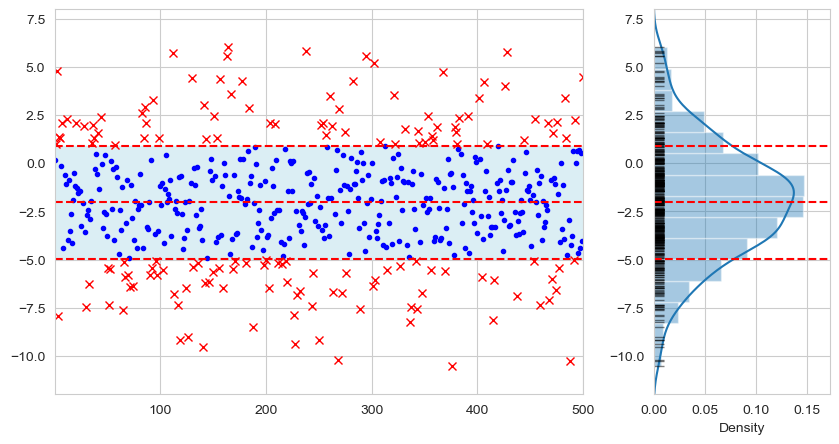

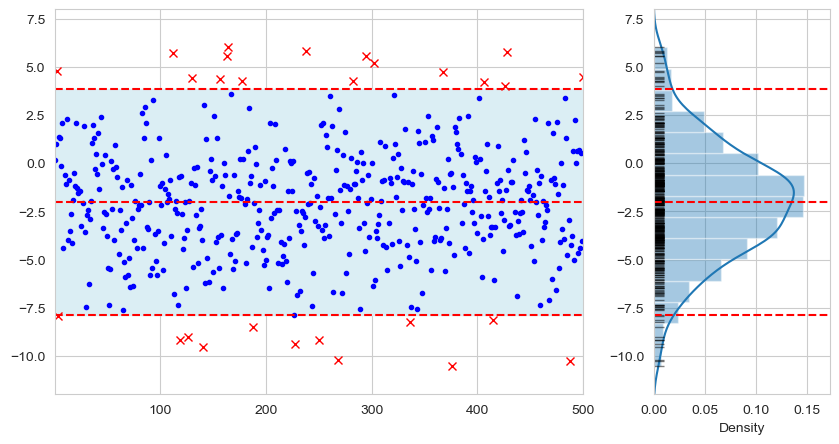

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_data = 500
# generate random data that follows normal distribution
data = np.random.normal(loc=-2, scale=3, size=(num_data, 1))
# 生成序列
loc_array = np.cumsum(np.ones_like(data))

mu_data = data.mean()  # 均值
sigma_data = data.std()  # 方差

for sigma_band_factor in [1, 2]:
    inside_data = np.copy(data)
    outside_data = np.copy(data)

    plus_sigma = mu_data + sigma_band_factor * sigma_data
    minus_sigma = mu_data - sigma_band_factor * sigma_data

    outside_data[(outside_data >= minus_sigma) & (outside_data <= plus_sigma)] = np.nan
    inside_data[(inside_data >= plus_sigma) | (inside_data <= minus_sigma)] = np.nan

    # 设置宽度比为 3:1
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})

    ax1.plot(loc_array, inside_data, marker='.', color='b', linestyle='None')
    ax1.plot(loc_array, outside_data, marker='x', color='r', linestyle='None')

    ax1.fill_between(loc_array, 0 * loc_array + plus_sigma, 0 * loc_array + minus_sigma, color='#DBEEF4')

    ax1.axhline(y=mu_data, color='r', linestyle='--')
    ax1.axhline(y=plus_sigma, color='r', linestyle='--')
    ax1.axhline(y=minus_sigma, color='r', linestyle='--')

    ax1.set_ylim([np.floor(data.min()) - 1, np.ceil(data.max()) + 1])
    ax1.set_xlim([loc_array.min(), loc_array.max()])

    ax2 = sns.distplot(data, rug=True, rug_kws={"color": "k",
                                                "alpha": 0.5,
                                                "height": 0.06,
                                                "lw": 0.5},
                       vertical=True, bins=15)
    # rug=True: 在分布图的下方绘制数据点的标记

    ax2.set_ylim([np.floor(data.min()) - 1, np.ceil(data.max()) + 1])
    ax2.axhline(y=mu_data, color='r', linestyle='--')
    ax2.axhline(y=plus_sigma, color='r', linestyle='--')
    ax2.axhline(y=minus_sigma, color='r', linestyle='--')
    print(np.count_nonzero(~np.isnan(outside_data)))


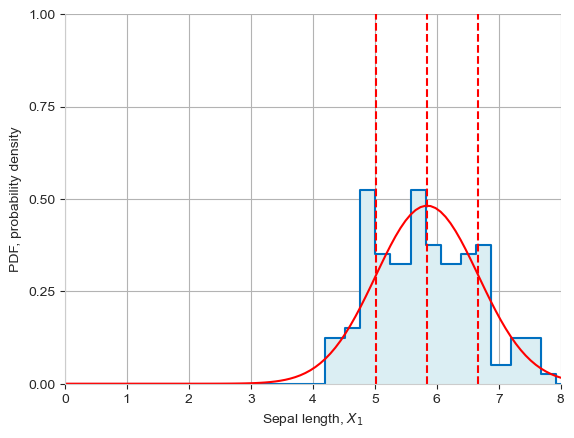

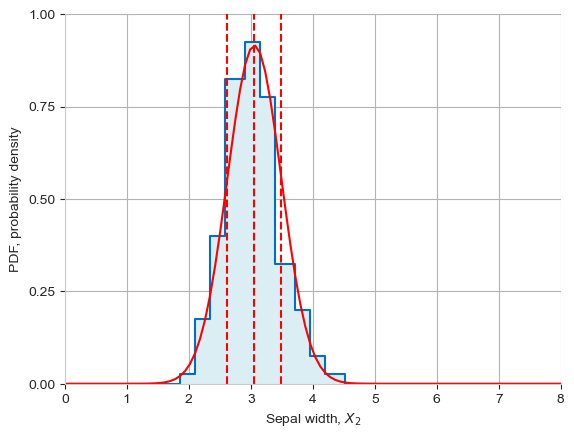

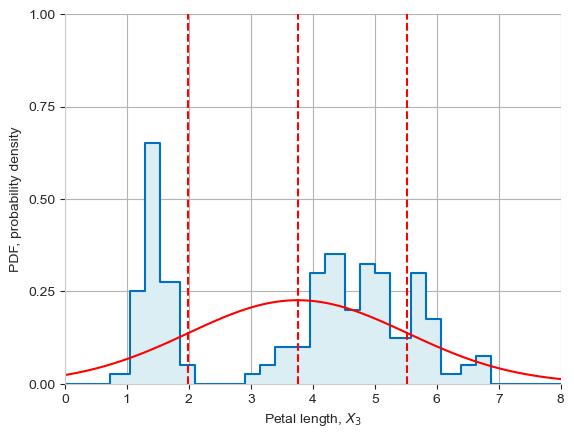

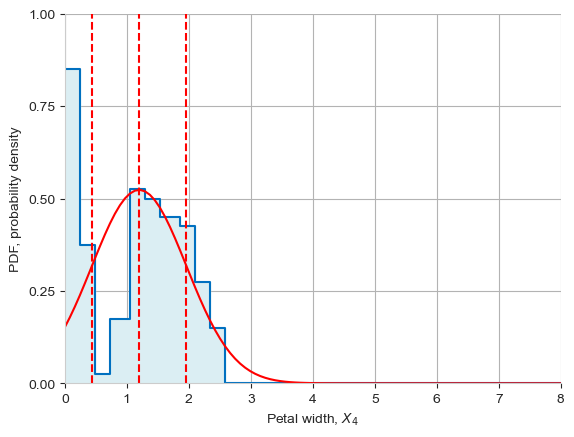

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from statsmodels.distributions.empirical_distribution import ECDF  # 经验累积分布函数
from scipy.stats import norm
import scipy

iris = load_iris()
# A copy from Sklearn

X = iris.data
y = iris.target

feature_names = ['Sepal length, $X_1$', 'Sepal width, $X_2$',
                 'Petal length, $X_3$', 'Petal width, $X_4$']

# 生成数组
x_array = np.linspace(0, 8, 100)
# Convert X array to dataframe
X_df = pd.DataFrame(X, columns=feature_names)

for feature in feature_names:
    sample = X_df[feature]
    
    # 绘制直方图
    hist = np.histogram(sample, bins=30, range=(0, 8))
    # 创建一个连续的概率分布对象
    hist_dist = scipy.stats.rv_histogram(hist)

    mu = sample.mean()  # 均值
    std = sample.std()  # 方差
    
    # PDF
    N_pdf = norm.pdf(x_array, loc=mu, scale=std)
    # 计算经验 PDF 的值
    epdf_y = hist_dist.pdf(x_array)

    fig, ax = plt.subplots()

    # plot empirical PDF
    plt.step(x_array, epdf_y, color='#0070C0')
    ax.fill_between(x_array, epdf_y, step="pre", color='#DBEEF3')

    plt.axvline(x=mu, color='r', linestyle='--')
    plt.axvline(x=mu + std, color='r', linestyle='--')
    plt.axvline(x=mu - std, color='r', linestyle='--')

    # plot parametric (normal) PDF
    plt.plot(x_array, N_pdf, 'r')

    plt.xlabel(feature)
    plt.ylabel('PDF, probability density')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().yaxis.set_ticks_position('left')
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.xlim(0, 8)
    plt.ylim(0, 1)
    plt.yticks(np.linspace(0, 1, 5))
    plt.grid(color=[0.7, 0.7, 0.7])

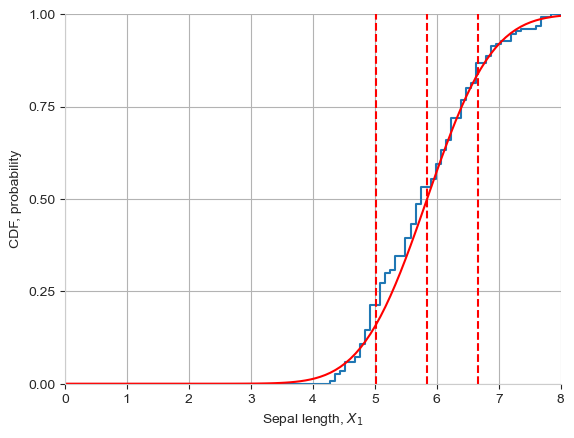

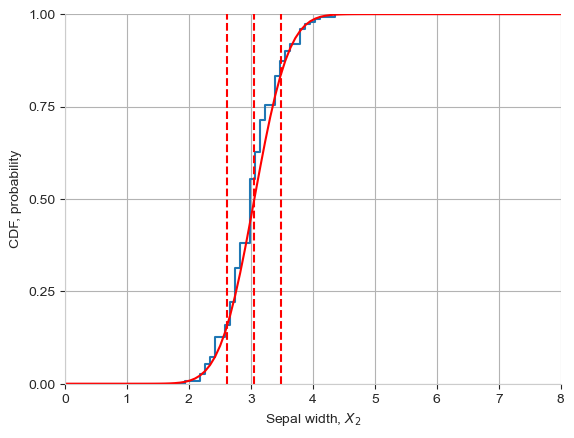

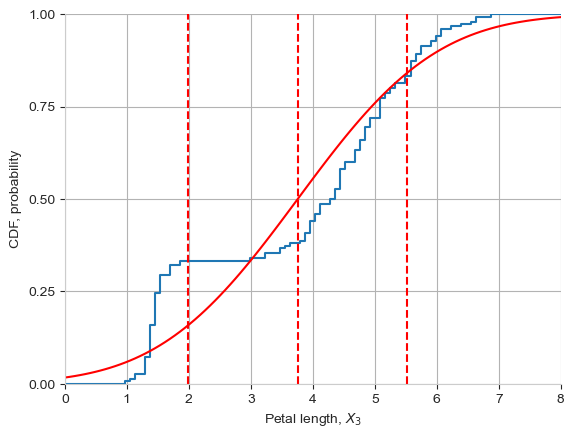

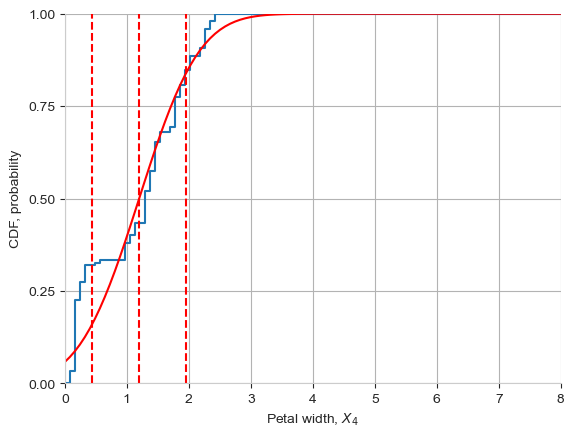

In [15]:
for feature in feature_names:
    
    sample = X_df[feature]

    mu = sample.mean()  # 均值
    std = sample.std()  # 方差

    # CDF
    N_cdf = norm.cdf(x_array, loc=mu, scale=std)
    # 创建一个经验 CDF 对象
    ecdf = ECDF(sample)
    # 计算 ECDF 的值
    ecdf_y = ecdf(x_array)

    fig, ax = plt.subplots()

    # plot empirical CDF
    plt.step(x_array, ecdf_y)

    # plot parametric (normal) CDF
    plt.plot(x_array, N_cdf, 'r')

    plt.axvline(x=mu, color='r', linestyle='--')
    plt.axvline(x=mu + std, color='r', linestyle='--')
    plt.axvline(x=mu - std, color='r', linestyle='--')

    plt.xlabel(feature)
    plt.ylabel('CDF, probability')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().yaxis.set_ticks_position('left')
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.xlim(0, 8)
    plt.ylim(0, 1)
    plt.yticks(np.linspace(0, 1, 5))
    plt.grid(color=[0.7, 0.7, 0.7])


In [17]:
import seaborn as sns

# Load the iris data
iris_sns = sns.load_dataset("iris", cache=False, data_home='./data/seaborn_data')

iris_CDF_df = pd.DataFrame()

for index in np.arange(0, 4):
    
    feature = iris_sns.columns[int(index)]
    sample = iris_sns[feature]
    
    # 绘制直方图
    hist = np.histogram(sample, bins=1000, range=(0, 8))
    # 创建一个连续的概率分布对象
    hist_dist = scipy.stats.rv_histogram(hist)
    # 计算经验 PDF
    ecdf_y = hist_dist.cdf(sample)

    # option B
    # ecdf = ECDF(sample)
    # ecdf_y = ecdf(sample)

    iris_CDF_df[feature] = np.array(ecdf_y)

iris_CDF_df['species'] = iris_sns['species']
print(iris_CDF_df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0      0.243333     0.853333      0.160000     0.033333  setosa
1      0.126667     0.380000      0.160000     0.033333  setosa
2      0.066667     0.626667      0.050000     0.033333  setosa
3      0.060000     0.590000      0.203333     0.033333  setosa
4      0.146667     0.873333      0.160000     0.033333  setosa


D:\miniconda\lib\site-packages\seaborn\axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
D:\miniconda\lib\site-packages\seaborn\axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)


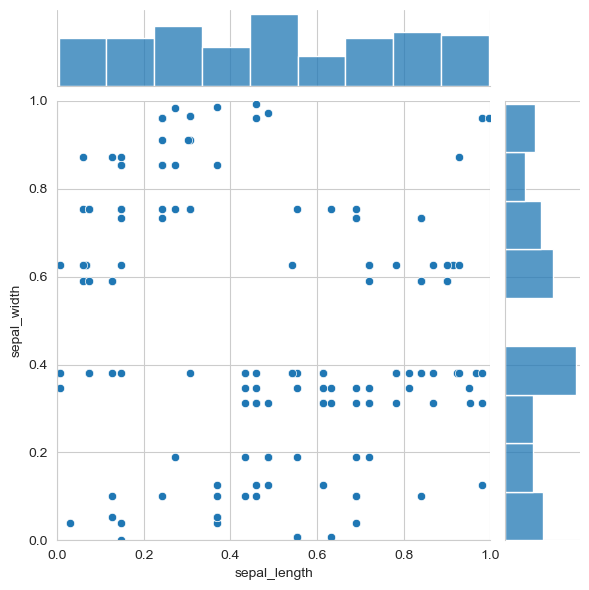

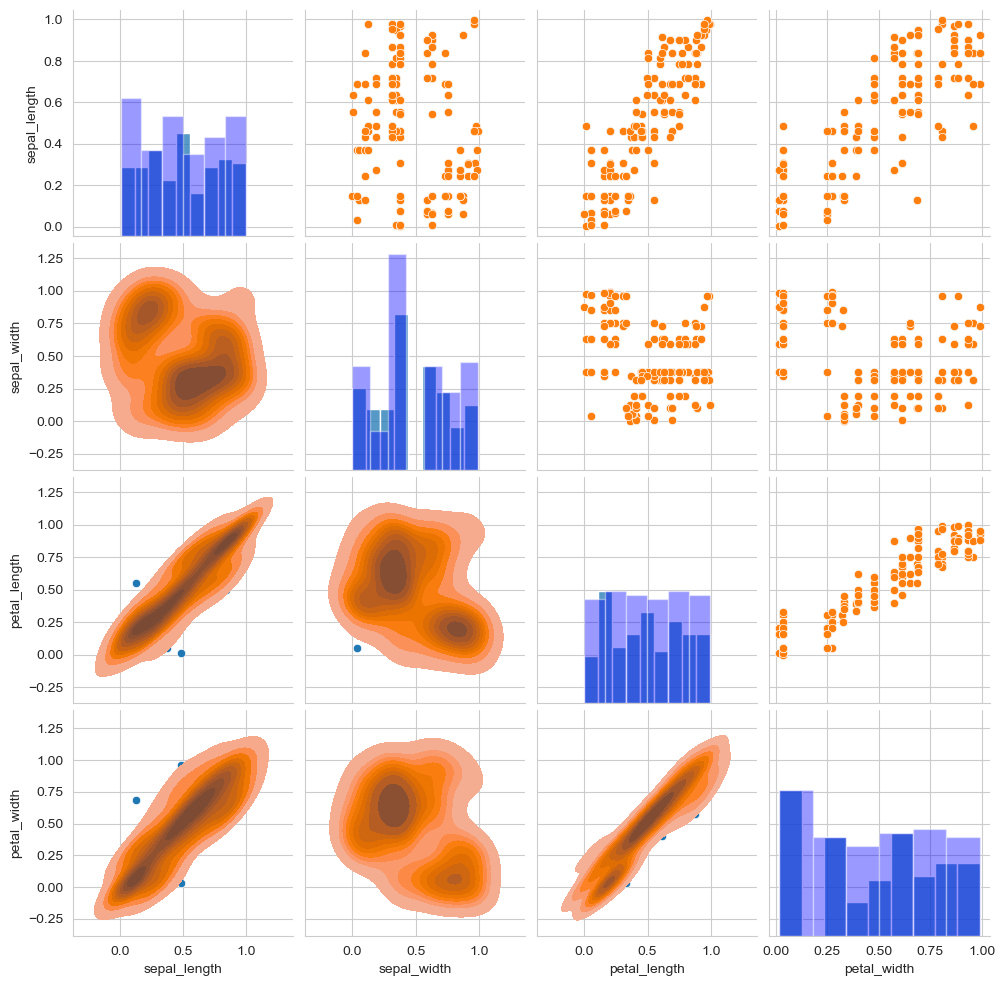

In [27]:
# fig, ax = plt.subplots()
g = sns.jointplot(data=iris_CDF_df,
                  x='sepal_length',
                  y='sepal_width',
                  xlim=(0, 1),
                  ylim=(0, 1))

# with no class labels
g = sns.pairplot(iris_CDF_df)
g.map_upper(sns.scatterplot) # levels=8, fill=True, cmap="Blues_d"
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.distplot, kde=False, color='b')

# g.axes[0,0].set_xlim((0,1))
# g.axes[0,1].set_xlim((0,1))
# g.axes[0,2].set_xlim((0,1))
# g.axes[0,3].set_xlim((0,1))

# g.axes[0,0].set_ylim((0,1))
# g.axes[1,0].set_ylim((0,1))
# g.axes[2,0].set_ylim((0,1))
# g.axes[3,0].set_ylim((0,1))


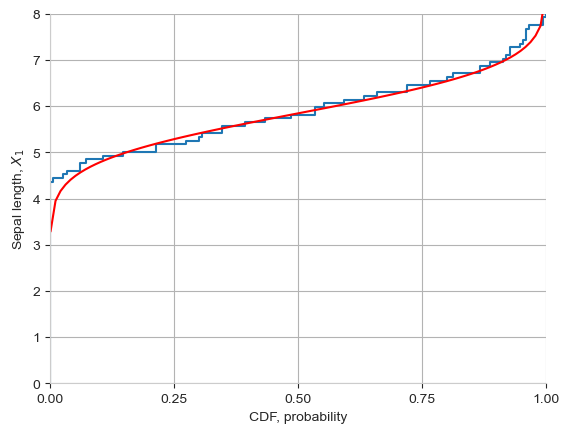

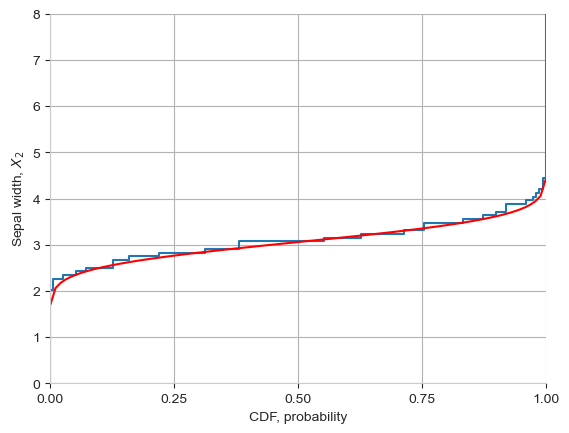

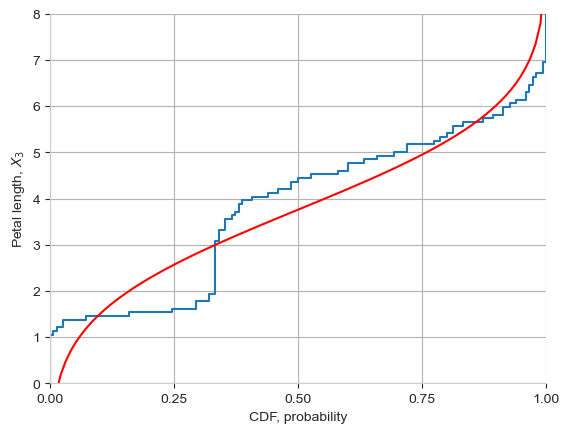

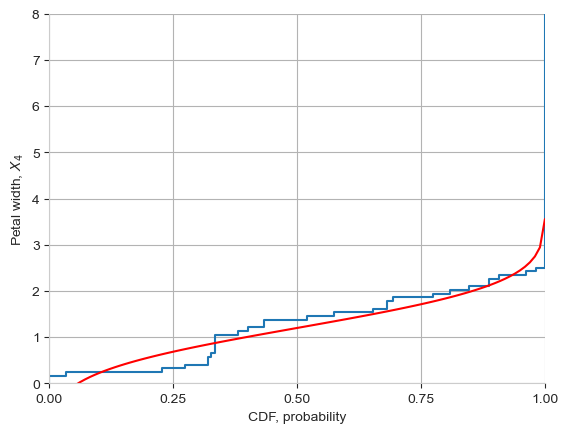

In [28]:
# 百分比
cdf_array = np.linspace(0.001, 0.999, 100)

for feature in feature_names:
    sample = X_df[feature]

    mu = sample.mean()
    std = sample.std()

    # norm.ppf 是 scipy.stats 模块中正态分布对象的百分位函数。这个函数的作用是计算给定百分位数下的正态分布的值
    x_icdf = norm.ppf(cdf_array, loc=mu, scale=std)
    # 创建 ECDF 对象
    ecdf = ECDF(sample)
    # 计算 ECDF 的值
    ecdf_y = ecdf(x_array)

    fig, ax = plt.subplots()

    # plot empirical ICDF
    plt.step(ecdf_y, x_array)

    # plot parametric (normal) ICDF
    plt.plot(cdf_array, x_icdf, 'r')

    plt.ylabel(feature)
    plt.xlabel('CDF, probability')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().yaxis.set_ticks_position('left')
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.ylim(0, 8)
    plt.xlim(0, 1)
    plt.xticks(np.linspace(0, 1, 5))
    plt.grid(color=[0.7, 0.7, 0.7])


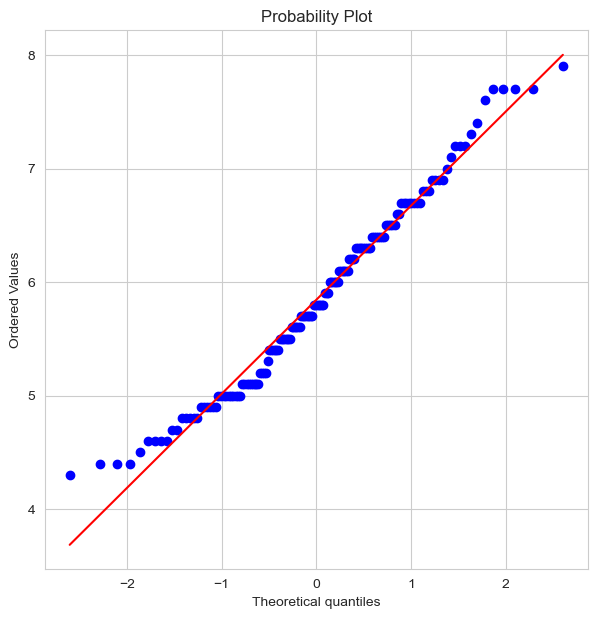

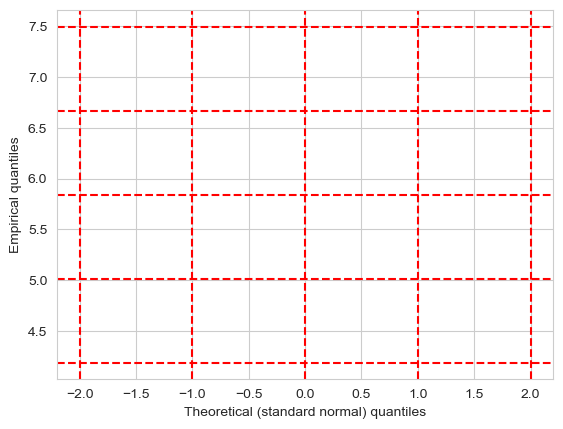

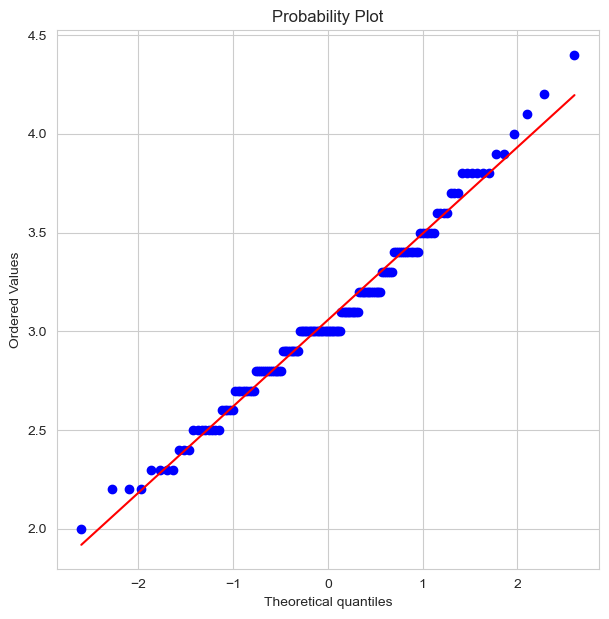

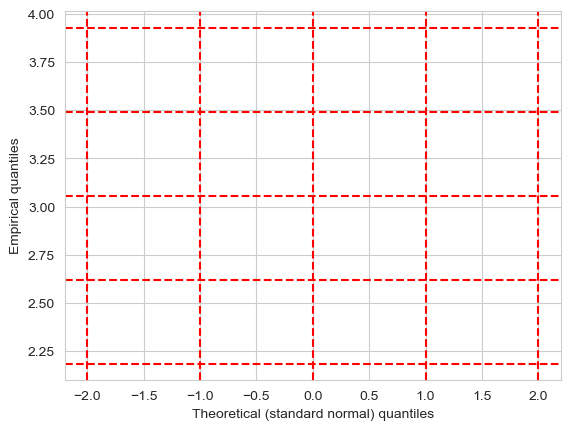

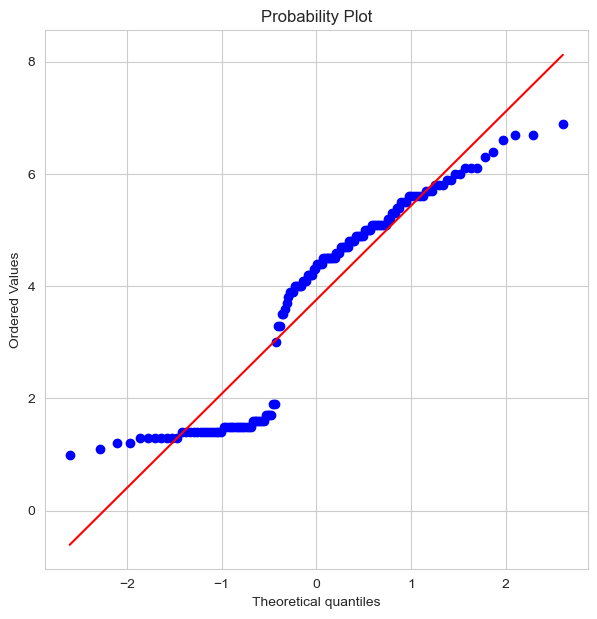

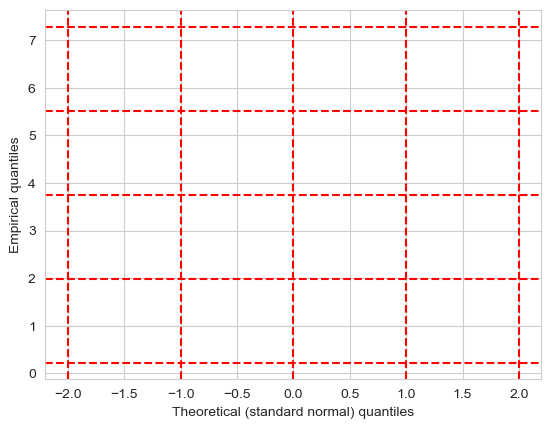

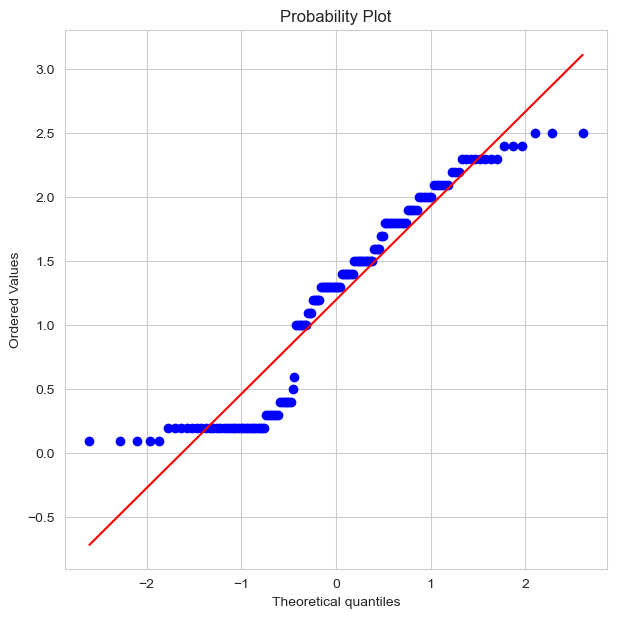

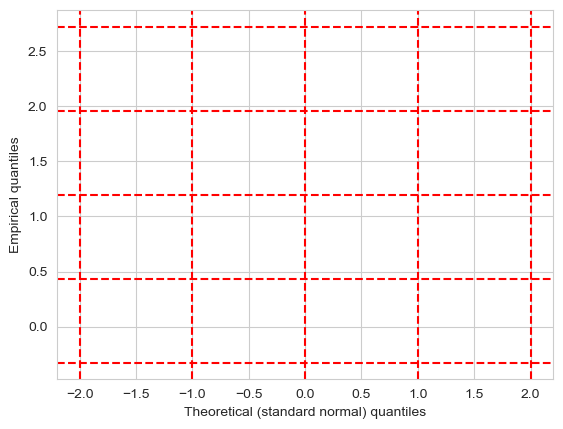

In [29]:
import pylab
import scipy.stats as stats

for feature in feature_names:
    
    sample = X_df[feature]
    mu = sample.mean()  # 均值
    std = sample.std()  # 方差

    fig = plt.figure(figsize=(7, 7))
    
    # 绘制概率图
    stats.probplot(sample, dist="norm", plot=pylab)
    pylab.show()

    plt.axhline(y=mu, color='r', linestyle='--')
    plt.axhline(y=mu + std, color='r', linestyle='--')
    plt.axhline(y=mu - std, color='r', linestyle='--')
    plt.axhline(y=mu + 2 * std, color='r', linestyle='--')
    plt.axhline(y=mu - 2 * std, color='r', linestyle='--')

    plt.axvline(x=0, color='r', linestyle='--')
    plt.axvline(x=1, color='r', linestyle='--')
    plt.axvline(x=-1, color='r', linestyle='--')
    plt.axvline(x=2, color='r', linestyle='--')
    plt.axvline(x=-2, color='r', linestyle='--')

    plt.xlabel('Theoretical (standard normal) quantiles')
    plt.ylabel('Empirical quantiles')

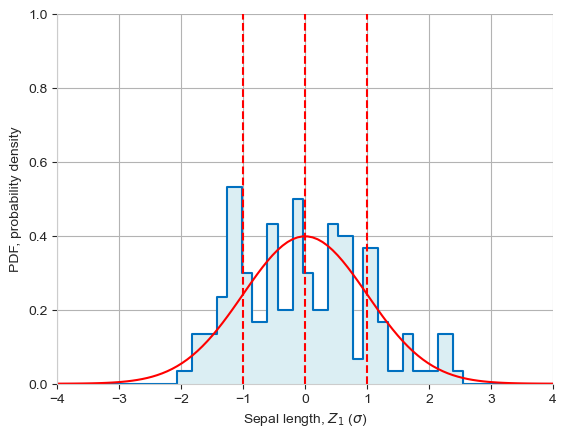

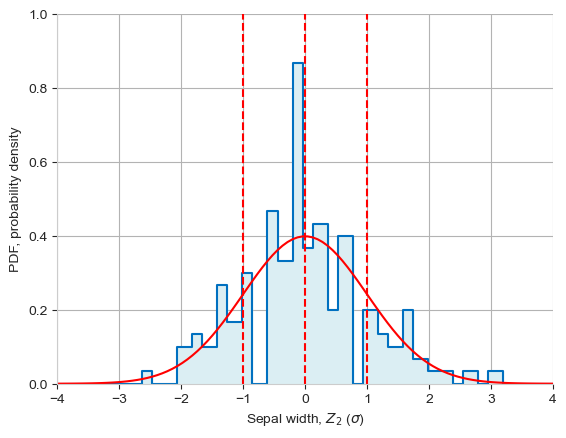

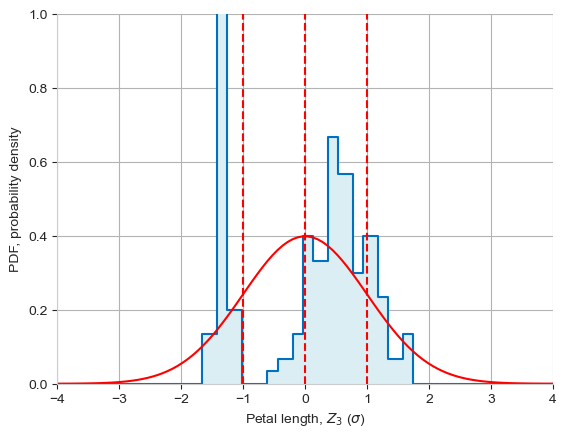

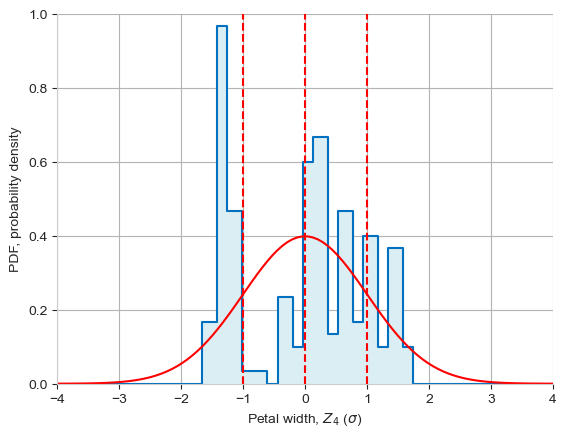

In [30]:
z_array = np.linspace(-4, 4, 100)

# Z 分数 (标准化)
Z_score_df = (X_df - X_df.mean()) / X_df.std()

for feature in feature_names:
    
    sample = Z_score_df[feature]
    
    # 绘制直方图
    hist = np.histogram(sample, bins=40, range=(-4, 4))
    # 创建一个连续的概率分布对象
    hist_dist = scipy.stats.rv_histogram(hist)

    mu = sample.mean()
    std = sample.std()
    # 计算 PDF
    N_pdf = norm.pdf(z_array, loc=mu, scale=std)
    # 计算 EPDF
    epdf_y = hist_dist.pdf(z_array)

    fig, ax = plt.subplots()

    # plot empirical PDF
    plt.step(z_array, epdf_y, color='#0070C0')
    ax.fill_between(z_array, epdf_y, step="pre", color='#DBEEF3')

    plt.axvline(x=mu, color='r', linestyle='--')
    plt.axvline(x=mu + std, color='r', linestyle='--')
    plt.axvline(x=mu - std, color='r', linestyle='--')

    # plot parametric (normal) PDF
    plt.plot(z_array, N_pdf, 'r')

    plt.xlabel(feature.replace('X', 'Z') + ' ($\sigma$)')
    plt.ylabel('PDF, probability density')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().yaxis.set_ticks_position('left')
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.xlim(-4, 4)
    plt.ylim(0, 1)
    plt.yticks(np.linspace(0, 1, 6))
    plt.grid(color=[0.7, 0.7, 0.7])

